In [13]:
# Importing dependencies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import keras

In [4]:
# Opening data
final_model_data = pd.read_csv('lending-club/transformed_final_data')
final_model_data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,2,27.144176,1,2.377693,432.66,1,0,11.050890,0,paid,...,0.0,0.0,100.0,50.0,0.0,0.0,60.223059,26.540936,18.370906,24.594526
1,8,21.544347,0,1.870263,306.45,6,2,11.350407,0,paid,...,0.0,2.0,95.7,28.6,1.0,0.0,39.386256,30.350337,25.406682,31.345765
2,13,26.207414,1,2.969388,471.70,7,2,11.918391,0,default,...,0.0,3.0,100.0,14.3,1.0,0.0,40.375424,33.094617,21.757671,31.521192
3,16,29.240177,0,2.013569,777.55,1,0,11.599103,0,paid,...,0.0,0.0,100.0,20.0,0.0,0.0,72.020827,40.827752,33.737307,43.465468
4,20,31.037762,1,2.555676,678.49,1,0,11.082143,1,paid,...,0.0,4.0,100.0,25.0,0.0,0.0,64.768407,34.896839,32.396118,24.972770


In [10]:
# Selecting target and features
X = final_model_data.drop(columns=['Unnamed: 0', 'loan_status'], axis=0)
y = final_model_data.loan_status

In [11]:
X.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,27.144176,1,2.377693,432.66,1,0,11.050890,0,4,10.78,...,0.0,0.0,100.0,50.0,0.0,0.0,60.223059,26.540936,18.370906,24.594526
1,21.544347,0,1.870263,306.45,6,2,11.350407,0,1,13.07,...,0.0,2.0,95.7,28.6,1.0,0.0,39.386256,30.350337,25.406682,31.345765
2,26.207414,1,2.969388,471.70,7,2,11.918391,0,2,9.39,...,0.0,3.0,100.0,14.3,1.0,0.0,40.375424,33.094617,21.757671,31.521192
3,29.240177,0,2.013569,777.55,1,0,11.599103,0,2,26.02,...,0.0,0.0,100.0,20.0,0.0,0.0,72.020827,40.827752,33.737307,43.465468
4,31.037762,1,2.555676,678.49,1,0,11.082143,1,2,21.77,...,0.0,4.0,100.0,25.0,0.0,0.0,64.768407,34.896839,32.396118,24.972770


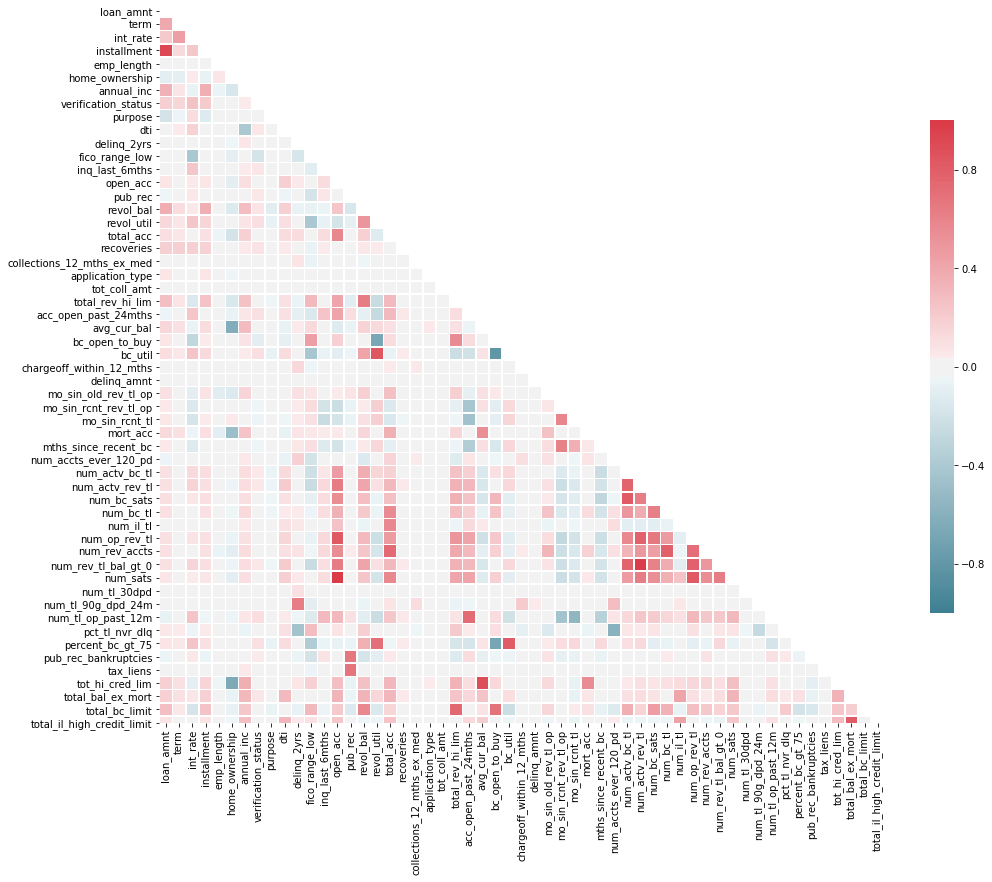

In [18]:
# Correlation between features
corr=X._get_numeric_data().corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=True, yticklabels=True)
plt.tight_layout()
plt.savefig('./resources/figure.png', dpi=600)

Given an imbalanced dataset, such as the Lending Club dataset where the rate of positive examples is about 85%, accuracy does not indicate the true performance of the model. The accuracy will depend on the overall default rate of the test data set. For example, in this case, a model that predicts any example to be non-defaulting would still achieve 85% accuracy. Furthermore, some models will bias toward clas- sifications that occur more often, such as SVM and Logistic Regression. Instead, we will look at sensitivity.

## Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [20]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [21]:
# Scaling features
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()

label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [23]:
encoded_y_train
encoded_y_train.shape

(354511,)

In [24]:
# Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial', solver ='newton-cg')
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.912623303649252
Testing Data Score: 0.9136082456778736


In [27]:
predictions = classifier.predict(X_test)
predictions_LR = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predictions_LR.head()

,Prediction,Actual
86766,paid,paid
82602,paid,paid
395711,paid,paid
196538,paid,paid
206475,paid,paid


In [28]:
coefficients = classifier.coef_
coefficients_array = coefficients[0]
coefficients_array

array([ 5.70233669e-01, -3.59105921e-01, -5.96007531e-01, -6.59960235e-01,
       -7.66107655e-03, -1.18743255e-01,  8.52168542e-02, -1.43045568e-02,
       -1.93136308e-01, -4.71280256e-01, -7.15445843e-01,  2.64676122e-01,
       -7.90327951e-02,  2.53006615e-01, -5.08242548e-01,  1.59008593e-01,
       -1.10486430e-02,  3.43348733e-02, -8.22637159e+01, -8.21155695e-01,
       -1.00917358e-01, -4.42228886e-02,  4.35589441e-01, -8.13552185e-01,
        2.44710701e-02, -1.70326563e-01, -2.98206525e-02, -1.25574561e-01,
       -2.24161252e-01,  1.83877831e-02, -1.88028950e-01,  3.80789746e-01,
        3.69872573e-01,  5.06934777e-01, -1.04770584e-01, -5.02574434e-03,
       -6.95596367e-01, -4.10196060e-01,  2.02003089e-01,  1.58757800e-01,
        2.62113522e-01,  2.24139493e-01,  2.20053317e-02, -4.04554454e-01,
        3.32060961e-01,  2.06522721e-01, -2.77055010e-02, -5.46186625e-02,
       -4.51275218e-02, -3.34172439e-01, -4.73647160e-01,  2.61487996e-01,
       -1.93184358e-01,  

In [29]:
# Calculating odds ratio
odds_ratio = np.exp(coefficients_array)
odds_ratio

array([1.76868029e+00, 6.98300383e-01, 5.51007130e-01, 5.16871887e-01,
       9.92368195e-01, 8.88035771e-01, 1.08895319e+00, 9.85797267e-01,
       8.24369599e-01, 6.24202618e-01, 4.88974058e-01, 1.30300889e+00,
       9.24009621e-01, 1.28789180e+00, 6.01551849e-01, 1.17234802e+00,
       9.89012169e-01, 1.03493112e+00, 1.87638579e-36, 4.39922944e-01,
       9.04007739e-01, 9.56740687e-01, 1.54587399e+00, 4.43280651e-01,
       1.02477294e+00, 8.43389352e-01, 9.70619596e-01, 8.81990000e-01,
       7.99186253e-01, 1.01855788e+00, 8.28590719e-01, 1.46343988e+00,
       1.44755015e+00, 1.66019452e+00, 9.00531095e-01, 9.94986864e-01,
       4.98776905e-01, 6.63520148e-01, 1.22385179e+00, 1.17205404e+00,
       1.29967408e+00, 1.25124555e+00, 1.02224923e+00, 6.67274046e-01,
       1.39383782e+00, 1.22939567e+00, 9.72674776e-01, 9.46846147e-01,
       9.55875579e-01, 7.15930317e-01, 6.22726937e-01, 1.29886135e+00,
       8.24329988e-01, 1.18458322e+00, 1.45094138e+00])

In [30]:
labels = list(X.columns)
labels

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'recoveries',
 'collections_12_mths_ex_med',
 'application_type',
 'tot_coll_amt',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_cr

In [32]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(classifier, random_state=1).fit(X_train_scaled,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1853 ± 0.0009,recoveries
0.0016 ± 0.0000,loan_amnt
0.0004 ± 0.0001,dti
0.0004 ± 0.0001,int_rate
0.0004 ± 0.0001,acc_open_past_24mths
0.0003 ± 0.0001,total_bc_limit
0.0003 ± 0.0001,home_ownership
0.0003 ± 0.0001,fico_range_low
0.0002 ± 0.0001,total_il_high_credit_limit
0.0002 ± 0.0001,revol_bal


In [67]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [69]:
# F1 score
y_true = y_test
y_pred = predictions

#print(f1_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))
print(f1_score(y_true, y_pred, average=None))

0.8708745302489913
0.9271564089328177
0.9209552088204555
[0.79 0.96]


In [70]:
# Confusion Matric
confusion_matrix(y_true, y_pred)

array([[15773,  8602],
       [    6, 93790]])

In [71]:
scoring = ['accuracy', 'precision']

Confusion matrix, without normalization
[[15773  8602]
 [    6 93790]]
Normalized confusion matrix
[[6.47e-01 3.53e-01]
 [6.40e-05 1.00e+00]]


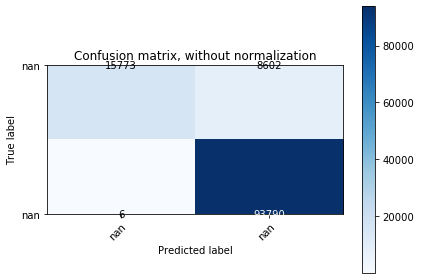

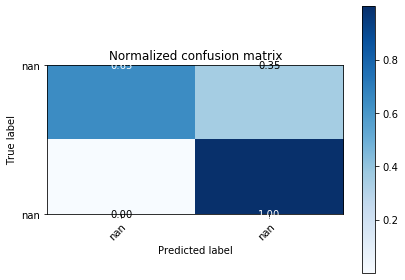

In [72]:
class_names = final_model_data.loan_status

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('resources/no_norm_confusion_matrix.png')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('resources/plots/normalized_confusion_matrix.png')
plt.show()